In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.io as sio

from ExtendedHamiltonianFunctions import *

In [45]:
thetval = 0.0/180*np.pi
Bmax = 1e-5
bvec = np.asarray([Bmax*np.sin(thetval),0.0,Bmax*np.cos(thetval)])

stevoop_e_gs = ExtendedStevensOperators(15/2)
stevoop_e_gs.set_bfield(bvec)
stevoop_e_es = ExtendedStevensOperators(13/2)
stevoop_e_es.set_bfield(bvec)

params = np.asarray([231.,-90.,-0.6,852.,0.0,396.,75.])

ground_state = stevoop_e_gs.build_ham(params)
w_g,v_g = np.linalg.eigh(ground_state)
v_g[np.abs(v_g)<1e-8] = 0.0

excited_state = stevoop_e_es.build_ham(params)
w_e,v_e = np.linalg.eigh(excited_state)

# now test outputs

print('Ground state splittings:'+str(np.unique(np.round(w_g,1))-np.min(np.round(w_g,1))))
print('Excited state splittings:'+str(np.unique(np.round(w_e,1))-np.min(np.round(w_e,1))))

print('Z1 g tensor:'+str(stevoop_e_gs.calc_g([v_g[:,0],v_g[:,1]])))

yout = np.unique(np.round(w_e,1))-np.min(np.round(w_e,1))
yout2 = np.append(yout,np.nan)
print(yout2.shape)
outdict = {'Z Experimental':np.asarray([0.0,10.7,31.9,51.4,189.5,228.7,253.3,282.1]),'Z Calculated':np.unique(np.round(w_g,1))-np.min(np.round(w_g,1)),
          'Y Experimental:':np.asarray([0.0,3.6,47.6,103.4,134.9,147.6,165.4,np.nan]),'Y Calculated':yout2}
outpd = pd.DataFrame(data=outdict)

print(outpd)

print('Z1 g tensor:'+str(stevoop_e_gs.calc_g([v_g[:,0],v_g[:,1]])))
print('Z2 g tensor:'+str(stevoop_e_gs.calc_g([v_g[:,2],v_g[:,3]])))
print('Y1 g tensor:'+str(stevoop_e_es.calc_g([v_e[:,0],v_e[:,1]])))
print('Y2 g tensor:'+str(stevoop_e_es.calc_g([v_e[:,2],v_e[:,3]])))

# print((8.45+8.28-0.1)*1.4*65)
# print((8.45+6.26-0.1)*1.4*65)

Ground state splittings:[  0.   20.9  26.4  52.1 231.7 272.3 296.3 321.9]
Excited state splittings:[  0.    6.7  46.6 124.7 155.7 175.3 189.6]
Z1 g tensor:[1.1971782552260097, 8.454007613059224]
(8,)
   Z Experimental  Z Calculated  Y Experimental:  Y Calculated
0             0.0           0.0              0.0           0.0
1            10.7          20.9              3.6           6.7
2            31.9          26.4             47.6          46.6
3            51.4          52.1            103.4         124.7
4           189.5         231.7            134.9         155.7
5           228.7         272.3            147.6         175.3
6           253.3         296.3            165.4         189.6
7           282.1         321.9              NaN           NaN
Z1 g tensor:[1.1971782552260097, 8.454007613059224]
Z2 g tensor:[3.6342204766516018, 7.040858286978018]
Y1 g tensor:[1.6094164925880026, 8.283221509441816]
Y2 g tensor:[2.289505957641779, 6.267721607365405]


In [34]:
thetval = 0.0/180*np.pi
Bmax = 1e-5
bvec = np.asarray([Bmax*np.sin(thetval),0.0,Bmax*np.cos(thetval)])

stevoop_e_gs = ExtendedStevensOperators(15/2)
stevoop_e_gs.set_bfield(bvec)
stevoop_e_es = ExtendedStevensOperators(13/2)
stevoop_e_es.set_bfield(bvec)

params = np.asarray([0.93*231.,0.678*-90.,0.944*-0.6,0.896*852.,0.0,0.709*396.,0.709*75.])
# params = np.asarray([0.8667*231.,0.700*-90.,0.944-0.6,0.967*852.,0.0,0.809*396.,0.709*75.])

ground_state = stevoop_e_gs.build_ham(params)
w_g,v_g = np.linalg.eigh(ground_state)
v_g[np.abs(v_g)<1e-8] = 0.0

excited_state = stevoop_e_es.build_ham(params)
w_e,v_e = np.linalg.eigh(excited_state)

# now test outputs

# print('Ground state splittings:'+str(np.unique(np.round(w_g,1))-np.min(np.round(w_g,1))))
# print('Excited state splittings:'+str(np.unique(np.round(w_e,1))-np.min(np.round(w_e,1))))

print('Z1 g tensor:'+str(stevoop_e_gs.calc_g([v_g[:,0],v_g[:,1]])))

yout = np.unique(np.round(w_e,1))-np.min(np.round(w_e,1))
yout2 = np.append(yout,np.nan)
print(yout2.shape)
outdict = {'Z Experimental':np.asarray([0.0,10.7,31.9,51.4,189.5,228.7,253.3,282.1]),'Z Calculated':np.unique(np.round(w_g,1))-np.min(np.round(w_g,1)),
          'Y Experimental:':np.asarray([0.0,3.6,47.6,103.4,134.9,147.6,165.4,np.nan]),'Y Calculated':yout2}
outpd = pd.DataFrame(data=outdict)

display(outpd)
# print('Z2 g tensor:'+str(stevoop_e_gs.calc_g([v_g[:,2],v_g[:,3]])))
# print('Y1 g tensor:'+str(stevoop_e_es.calc_g([v_e[:,0],v_e[:,1]])))
# print('Y2 g tensor:'+str(stevoop_e_es.calc_g([v_e[:,2],v_e[:,3]])))

# print((8.45+8.28-0.1)*1.4*65)
# print((8.45+6.26-0.1)*1.4*65)

Z1 g tensor:[0.8214216074814954, 8.104069888656499]
(8,)


,Z Experimental,Z Calculated,Y Experimental:,Y Calculated
0,0.0,0.0,0.0,0.0
1,10.7,6.7,3.6,5.7
2,31.9,20.0,47.6,51.5
3,51.4,51.5,103.4,102.7
4,189.5,179.3,134.9,135.4
5,228.7,214.9,147.6,146.3
6,253.3,228.1,165.4,158.9
7,282.1,247.6,NaN,NaN


In [37]:
thetval = 0.0/180*np.pi
Bmax = 1e-5
bvec = np.asarray([Bmax*np.sin(thetval),0.0,Bmax*np.cos(thetval)])

stevoop_e_gs = ExtendedStevensOperators(15/2)
stevoop_e_gs.set_bfield(bvec)
stevoop_e_es = ExtendedStevensOperators(13/2)
stevoop_e_es.set_bfield(bvec)

params = np.asarray([0.973*231.,0.67*-90.,0.982*-0.6,0.814*852.,0.0,0.396*396.,0.396*75.])
params = np.asarray([0.92*231.,0.585*-90.,0.947*-0.6,0.88*852.,0.0,0.554*396.,0.554*75.])
# params = np.asarray([0.8667*231.,0.700*-90.,0.944-0.6,0.967*852.,0.0,0.809*396.,0.709*75.])

ground_state = stevoop_e_gs.build_ham(params)
w_g,v_g = np.linalg.eigh(ground_state)
v_g[np.abs(v_g)<1e-8] = 0.0

excited_state = stevoop_e_es.build_ham(params)
w_e,v_e = np.linalg.eigh(excited_state)

# now test outputs

# print('Ground state splittings:'+str(np.unique(np.round(w_g,1))-np.min(np.round(w_g,1))))
# print('Excited state splittings:'+str(np.unique(np.round(w_e,1))-np.min(np.round(w_e,1))))

print('Z1 g tensor:'+str(stevoop_e_gs.calc_g([v_g[:,0],v_g[:,1]])))

yout = np.unique(np.round(w_e,1))-np.min(np.round(w_e,1))
yout2 = np.append(yout,np.nan)
print(yout2.shape)
outdict = {'Z Experimental':np.asarray([0.0,10.7,31.9,51.4,189.5,228.7,253.3,282.1]),'Z Calculated':np.unique(np.round(w_g,1))-np.min(np.round(w_g,1)),
          'Y Experimental:':np.asarray([0.0,3.6,47.6,103.4,134.9,147.6,165.4,np.nan]),'Y Calculated':yout2}
outpd = pd.DataFrame(data=outdict)

display(outpd)
# print('Z2 g tensor:'+str(stevoop_e_gs.calc_g([v_g[:,2],v_g[:,3]])))
# print('Y1 g tensor:'+str(stevoop_e_es.calc_g([v_e[:,0],v_e[:,1]])))
# print('Y2 g tensor:'+str(stevoop_e_es.calc_g([v_e[:,2],v_e[:,3]])))

# print((8.45+8.28-0.1)*1.4*65)
# print((8.45+6.26-0.1)*1.4*65)

Z1 g tensor:[0.9555278187068846, 8.158651547629843]
(8,)


,Z Experimental,Z Calculated,Y Experimental:,Y Calculated
0,0.0,0.0,0.0,0.0
1,10.7,2.3,3.6,5.3
2,31.9,32.2,47.6,58.0
3,51.4,60.7,103.4,97.8
4,189.5,165.0,134.9,128.9
5,228.7,196.3,147.6,139.0
6,253.3,205.1,165.4,149.9
7,282.1,223.2,NaN,NaN


In [34]:
factor1 = 0.952
factor2 = 0.955
factor3 = 0.98

thetval = 0.0/180*np.pi
Bmax = 1e-5
bvec = np.asarray([Bmax*np.sin(thetval),0.0,Bmax*np.cos(thetval)])

stevoop_e_gs = ExtendedStevensOperators(15/2)
stevoop_e_gs.set_bfield(bvec)
stevoop_e_es = ExtendedStevensOperators(13/2)
stevoop_e_es.set_bfield(bvec)

params = np.asarray([231.*np.power(factor2,3),-90.*np.power(factor2,5),-0.6*np.power(factor2,7),
                     852.*np.power(factor3,5),0.0*np.power(factor3,5),396.*np.power(factor3,7),75.*np.power(factor3,7)])

ground_state = stevoop_e_gs.build_ham(params)
w_g,v_g = np.linalg.eigh(ground_state)
v_g[np.abs(v_g)<1e-8] = 0.0

excited_state = stevoop_e_es.build_ham(params)
w_e,v_e = np.linalg.eigh(excited_state)

# now test outputs

print('Ground state splittings:'+str(np.unique(np.round(w_g,1))-np.min(np.unique(np.round(w_g,1)))))
print('Excited state splittings:'+str(np.unique(np.round(w_e,1))-np.min(np.unique(np.round(w_e,1)))))

print('Z1 g tensor:'+str(stevoop_e_gs.calc_g([v_g[:,0],v_g[:,1]])))
print('Z2 g tensor:'+str(stevoop_e_gs.calc_g([v_g[:,2],v_g[:,3]])))

Ground state splittings:[  0.   17.3  20.9  47.6 200.5 239.2 256.6 279.5]
Excited state splittings:[  0.    5.2  42.5 107.1 138.1 152.3 165.3]
Z1 g tensor:[1.3010665237714027, 8.433356109392014]
Z2 g tensor:[3.3557512585412392, 7.192724469816346]


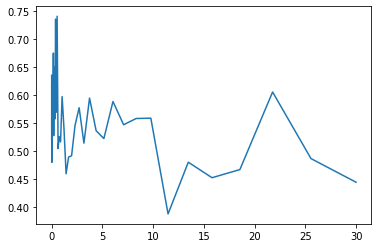

In [43]:
pathname = r'Z:\deleonlab\manuscripts\2019_SiV0RydbergStates\Figures_ODMR\Fig1 ODMR\Rabi'
loadnames = ['PLpulsewidth_39598.mat']
#loadnames = ['PLpulsewidth_40139.mat']
filename = os.path.join(pathname,loadnames[0])
Rabi = sio.loadmat(filename)
TauRabi = Rabi['xvals'][0]*1e9
PLRabi = (Rabi['pl'][0]-1)*100

pathname = r'Z:\deleonlab\manuscripts\2019_SiV0RydbergStates\Figures_ODMR\Fig1 ODMR\T1'
loadnames = ['PLtau_39743.mat','PLtau_40053.mat','PLtau_39769.mat']

# 39743 6K
# 39762, 40053, 50K
filename = os.path.join(pathname,loadnames[0])
T1 = sio.loadmat(filename)
filename = os.path.join(pathname,loadnames[1])
T150K = sio.loadmat(filename)
filename = os.path.join(pathname,loadnames[2])
T100ms = sio.loadmat(filename)
TauT1= T1['xvals'][0]*1e3
PLT1 = -(T1['pl'][0])*100
TauT1 = TauT1[0:]
PLT1 = PLT1[0:]


plt.figure()
plt.plot(TauT1,PLT1)
plt.show()